<a href="https://colab.research.google.com/github/prachimodi-142/MachineLearning/blob/main/HW6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

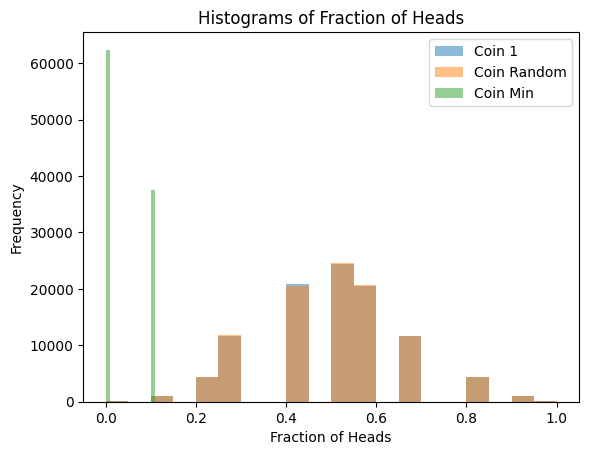

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# number of coins and flips
n_coins = 1000
n_flips = 10

# repeat experiment for 100,000 runs
n_runs = 100000

# arrays to store results
v1 = np.zeros(n_runs)
vrand = np.zeros(n_runs)
vmin = np.zeros(n_runs)

# perform experiment
for i in range(n_runs):
    # generate random coins and flip them
    coins = np.random.randint(2, size=(n_coins, n_flips))

    # compute fractions of heads
    v1[i] = coins[0].mean()
    vrand[i] = coins[np.random.randint(n_coins)].mean()
    vmin[i] = coins[np.argmin(coins.sum(axis=1))].mean()

# plot histograms
plt.hist(v1, bins=20, alpha=0.5, label='Coin 1')
plt.hist(vrand, bins=20, alpha=0.5, label='Coin Random')
plt.hist(vmin, bins=20, alpha=0.5, label='Coin Min')
plt.xlabel('Fraction of Heads')
plt.ylabel('Frequency')
plt.title('Histograms of Fraction of Heads')
plt.legend()
plt.show()

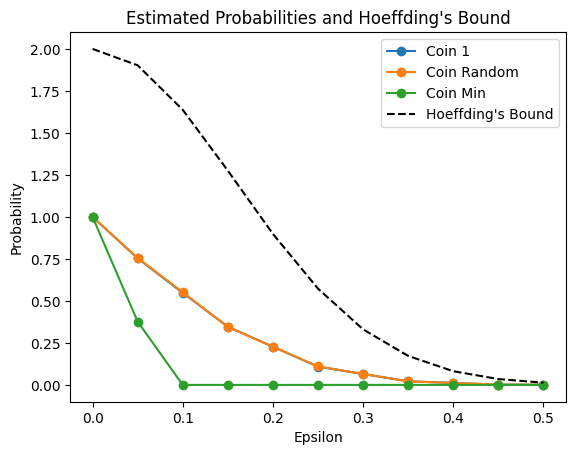

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# number of coins and flips
n_coins = 1000
n_flips = 10

# repeat experiment for 100,000 runs
n_runs = 100000

# arrays to store results
v1 = np.zeros(n_runs)
vrand = np.zeros(n_runs)
vmin = np.zeros(n_runs)

# perform experiment
for i in range(n_runs):
    # generate random coins and flip them
    coins = np.random.randint(2, size=(n_coins, n_flips))

    # compute fractions of heads
    v1[i] = coins[0].mean()
    vrand[i] = coins[np.random.randint(n_coins)].mean()
    vmin[i] = coins[np.argmin(coins.sum(axis=1))].mean()

# calculate means
mu1 = v1.mean()
murand = vrand.mean()
mumin = vmin.mean()

# calculate estimated probabilities
epsilon = np.arange(0, 0.55, 0.05)
p1 = np.zeros(len(epsilon))
prand = np.zeros(len(epsilon))
pmin = np.zeros(len(epsilon))
for i in range(len(epsilon)):
    p1[i] = np.mean(np.abs(v1 - mu1) > epsilon[i])
    prand[i] = np.mean(np.abs(vrand - murand) > epsilon[i])
    pmin[i] = np.mean(np.abs(vmin - mumin) > epsilon[i])

# calculate Hoeffding's bound
hoeffding = 2 * np.exp(-2 * epsilon**2 * n_flips)

# plot estimated probabilities and Hoeffding's bound
plt.plot(epsilon, p1, 'o-', label='Coin 1')
plt.plot(epsilon, prand, 'o-', label='Coin Random')
plt.plot(epsilon, pmin, 'o-', label='Coin Min')
plt.plot(epsilon, hoeffding, 'k--', label="Hoeffding's Bound")
plt.xlabel('Epsilon')
plt.ylabel('Probability')
plt.title('Estimated Probabilities and Hoeffding\'s Bound')
plt.legend()
plt.show()